# Import Python Libraries

In [1]:
import numpy as np
import time
import random

In [2]:
from sklearn.ensemble import RandomForestClassifier 
import sklearn.metrics as metrics

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

print( tf.__version__ )

2.8.1


# FASHION data

In [4]:
#Load in Fashion Data
mnist = tf.keras.datasets.fashion_mnist # 28x28 Fashion Image Data

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]


# NUMBER data

In [5]:
#Load in Data
# mnist = tf.keras.datasets.mnist # 28x28 Handwritten Digits 0-9

In [6]:


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the Data
# x_train = tf.keras.utils.normalize( x_train, axis=1 )
# x_test = tf.keras.utils.normalize( x_test, axis=1 )

# Divide training and testing sets by 255 
x_train = x_train / 255 
x_test = x_test / 255 



In [7]:

print( type( x_train ) )
print( x_train.shape )

print( type( y_train ) )
print( y_train.shape )


<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


In [8]:
INPUT_SHAPE = x_train[0].shape
print("Shape = ", INPUT_SHAPE )

TOTAL_SIZE = INPUT_SHAPE[0] * INPUT_SHAPE[1]
print("TOTAL SIZE = ", TOTAL_SIZE)


Shape =  (28, 28)
TOTAL SIZE =  784


In [9]:
def getRandomIndex( DATA ) :
    return random.randint(0, DATA.shape[0] )

who= 293
6
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00392157 0.         0.07058824
  0.58039216 0.20392157 0.06666667 0.27058824 0.20784314 0.
  0.         0.00392157 0.00392157 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.16470588
  0.82352941 0.91372549 0.80392157 0.59215686 0.47058824 0.02745098
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.06666667 0.16862745 0.25490196 0.15294118
  0.30588235 0.90588235 0.76470588 0.31372549 0.49411765 0.50196078
  0.32156863 0.18823529 0.07058824 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.03921569 0.2627451  0.28

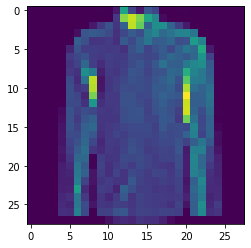

In [10]:

who=0
who=getRandomIndex( x_train )

print("who=", who)

print( y_train[who])
print( x_train[who])
plt.imshow(x_train[who], plt.cm.binary) 
plt.imshow(x_train[who] ) 


# SOLVE USING RANDOM FORESTS

In [11]:
new_x_train = []
for i in x_train :
    new_x_train.append( i.flatten() )
new_x_train = np.array( new_x_train )

new_x_test = []
for i in x_test :
    new_x_test.append( i.flatten() )
new_x_test = np.array( new_x_test )

print( x_train.shape )
print( new_x_train.shape )

(60000, 28, 28)
(60000, 784)


In [12]:

start_time = time.time()

theTrees = int( 2*TOTAL_SIZE )

clf = RandomForestClassifier( n_estimators = theTrees )
clf.fit( new_x_train, y_train )

print("Execution Time = ", (time.time()-start_time) )


Execution Time =  873.5348052978516


In [13]:
pred_train = clf.predict( new_x_train )
print( pred_train[0] )
RF_acc_train = metrics.accuracy_score(y_train, pred_train )
print( "train accuracy", RF_acc_train )

pred_test = clf.predict( new_x_test )
print( pred_test[0] )
RF_acc = metrics.accuracy_score(y_test, pred_test )
print( "test accuracy", RF_acc )


9
train accuracy 1.0
9
test accuracy 0.8781


# SOLVE USING TENSOR FLOW NEURAL NETWORKS

In [32]:
theEpochs = 50

theActivation = tf.keras.activations.relu


units_01 = int( 2*TOTAL_SIZE )
units_02 = units_01

DENSE_LAYER_01 = tf.keras.layers.Dense( units=units_01, activation=theActivation )
DENSE_LAYER_02 = tf.keras.layers.Dense( units=units_02, activation=theActivation )
DENSE_LAYER_XX = tf.keras.layers.Dense(10, activation=tf.nn.softmax )

DROPOUT_LAYER = tf.keras.layers.Dropout( 0.2 )


theOptimizer = tf.keras.optimizers.Adam()
theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()

theSplit = 0.3
theBatchSize = 32
verboseFlag = True

theTensorFlowSaveFile = "TF_Number_Model"

In [33]:

# Build the Model

start_time = time.time()

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten( input_shape=INPUT_SHAPE ) )
model.add( DENSE_LAYER_01 )
model.add( DROPOUT_LAYER )
model.add( DENSE_LAYER_02 )
model.add( DENSE_LAYER_XX )
# model.compile( optimizer=theOptimizer, loss=theLossMetric )
model.compile( optimizer=theOptimizer, loss=theLossMetric, metrics=['accuracy'] )
# model.fit(x_train, y_train, epochs=theEpochs, verbose = verboseFlag )
model.fit(x_train, y_train, epochs=theEpochs, validation_split=theSplit, batch_size=theBatchSize, verbose = verboseFlag )


print("Execution Time = ", (time.time()-start_time) )




Epoch 1/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.5249 - accuracy: 0.8088 - val_loss: 0.4330 - val_accuracy: 0.8384
Epoch 2/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.4050 - accuracy: 0.8515 - val_loss: 0.3842 - val_accuracy: 0.8583
Epoch 3/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3710 - accuracy: 0.8615 - val_loss: 0.3564 - val_accuracy: 0.8711
Epoch 4/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3459 - accuracy: 0.8714 - val_loss: 0.3365 - val_accuracy: 0.8762
Epoch 5/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3305 - accuracy: 0.8760 - val_loss: 0.3298 - val_accuracy: 0.8805
Epoch 6/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3147 - accuracy: 0.8828 - val_loss: 0.3346 - val_accuracy: 0.8809
Epoch 7/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3063 - accuracy: 0.8850 - val_loss: 0.3244 -

In [34]:
probs = model.predict( x_test )

pred_list = []
for p in probs :
    pred_list.append( np.argmax( p ) )
pred = np.array( pred_list )
acc_score = metrics.accuracy_score( y_test, pred)

for i in range(5) :
    who = getRandomIndex( x_test )
    print("WHO = ", who, " Predicted =", pred[who], " Actual = ", y_test[who] )

print(" --------- ")
print("accuracy = ", acc_score)


WHO =  1000  Predicted = 0  Actual =  0
WHO =  6625  Predicted = 8  Actual =  2
WHO =  6726  Predicted = 3  Actual =  3
WHO =  526  Predicted = 4  Actual =  4
WHO =  9653  Predicted = 0  Actual =  0
 --------- 
accuracy =  0.8873


In [35]:
NN_loss, NN_acc = model.evaluate( x_test, y_test )
print("loss=",NN_loss)
print("accuracy",NN_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4717 - accuracy: 0.8873
loss= 0.4717339873313904
accuracy 0.8873000144958496


In [36]:
model.save( theTensorFlowSaveFile )

INFO:tensorflow:Assets written to: TF_Number_Model/assets


In [37]:
new_model= tf.keras.models.load_model( theTensorFlowSaveFile )

In [38]:
predictions = new_model.predict( x_test ) 

[9.9998260e-01 4.7283114e-14 7.7661616e-07 2.1396127e-09 5.1746684e-12
 1.5040620e-17 1.6681608e-05 3.5198962e-24 1.1646302e-13 1.8438536e-27]
predict= 0 actual= 0


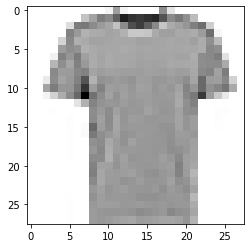

In [39]:
who=getRandomIndex( x_test )
print( predictions[who]) # probability score
result = np.argmax( list(predictions[who]) )
print("predict=",result,"actual=",y_test[who])
plt.imshow( x_test[who], plt.cm.binary )
plt.show()

# Accuracy of RANDOM FOREST and NEURAL NETWORK

In [40]:
print("RF accuracy", RF_acc )
print("NN accuracy",NN_acc)

RF accuracy 0.8781
NN accuracy 0.8873000144958496
